# Project P2
### Contains my resolution of the second project from Data Analytics NanoDegree course.

### Goal
##### The goal for this notebook is to show a simple example of an analysis of the Titanic dataset in Python using Numpy and Pandas libraries. 

### Data Exploration
#### Data Dictionary

|Variable|	Definition|
|--------|------------|
|survival|	Survival  |	
|pclass	 |Ticket class|
|sex	 |Sex         |	
|Age	|Age in years |
|sibsp	|# of siblings | / spouses aboard the Titanic
|parch	|# of parents | / children aboard the Titanic
|ticket	|Ticket number|
|fare	|Passenger fare|
|cabin	|Cabin number|	
|embarked	|Port of Embarkation|

#### Variable Notes

C = Cherbourg, Q = Queenstown, S = Southampton

0 = No, 1 = Yes

1 = 1st, 2 = 2nd, 3 = 3rd

pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
print(titanic_data.describe())
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
len(titanic_data)

891

In [21]:
titanic_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

In [22]:
titanic_data['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [32]:
print(len(titanic_data.loc[titanic_data['Cabin'].isnull() == True]))

687


In [36]:
titanic_data.isnull().any().any

<bound method Series.any of PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool>

In [37]:
print(len(titanic_data.loc[titanic_data['Age'].isnull() == True]))

177


In [39]:
print(len(titanic_data.loc[titanic_data['Embarked'].isnull() == True]))

2


Good variables to explore are Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare and Embarker. The Variables Ticked seens to be useless and Cabin has to many NaN

### Questions that are going to be answered:
 1) How many passengers that survived?
 
 2) From with gender are most of the survivers?
 
 3) From with age group are most of the survivers?
 
 4) Does your chances of survive increase if you have a relative on board?
 
 5) Are survivers from a distinct social class?
 
 6) With part of the ship had more survivers?

### Data Wrangler

1 - Removing data that is not going to be used. Collumns Name, Ticked and Cabin
    Since we have information if someone has a parent or spouse on board we do not have to deal with the variable Name. We could split and categorize in surname or titles.

In [2]:
titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


2 - Dealing with nulls

In [4]:
index_is_age_nan = titanic_data.index[titanic_data['Age'].isnull()]
print(titanic_data.iloc[index_is_age_nan])

     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch      Fare  \
5              6         0       3    male  NaN      0      0    8.4583   
17            18         1       2    male  NaN      0      0   13.0000   
19            20         1       3  female  NaN      0      0    7.2250   
26            27         0       3    male  NaN      0      0    7.2250   
28            29         1       3  female  NaN      0      0    7.8792   
29            30         0       3    male  NaN      0      0    7.8958   
31            32         1       1  female  NaN      1      0  146.5208   
32            33         1       3  female  NaN      0      0    7.7500   
36            37         1       3    male  NaN      0      0    7.2292   
42            43         0       3    male  NaN      0      0    7.8958   
45            46         0       3    male  NaN      0      0    8.0500   
46            47         0       3    male  NaN      1      0   15.5000   
47            48         

In [5]:
index_is_embarked_nan = titanic_data.index[titanic_data['Embarked'].isnull()]
print(titanic_data.iloc[index_is_embarked_nan])

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61            62         1       1  female  38.0      0      0  80.0      NaN
829          830         1       1  female  62.0      0      0  80.0      NaN


Going to keep the rows with NaN for now, they can still be used to compute same statistics

### Explore
#### 1) How many passengers did survive?

In [56]:
print("from %d, %d survived" %(len(titanic_data) ,titanic_data['Survived'].sum()))

from 891, 342 survived


#### 2) From with gender are most of the survivers?

There was 233 female survivers against 109 male survivers, while 81 females did not survive and 468 male did not survive


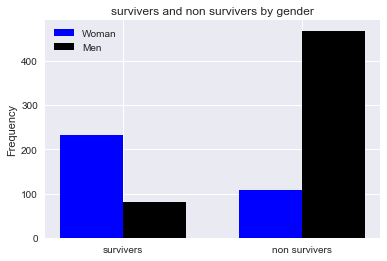

In [57]:
titanic_survivers_data = titanic_data.iloc[titanic_data.index[titanic_data['Survived'] == 1]]
titanic_non_survivers_data = titanic_data.iloc[titanic_data.index[titanic_data['Survived'] == 0]]

counter_female_survivers = 0
counter_male_survivers = 0
counter_female_non_survivers = 0
counter_male_non_survivers = 0

for surviver in titanic_survivers_data['Sex']:
    if surviver == 'female':
        counter_female_survivers += 1
    else:
        counter_male_survivers += 1
        
for surviver in titanic_non_survivers_data['Sex']:
    if surviver == 'female':
        counter_female_non_survivers += 1
    else:
        counter_male_non_survivers += 1

print('There was %d female survivers against %d male survivers, while %d females did not survive and %d male did not survive'
     %(counter_female_survivers, counter_male_survivers, counter_female_non_survivers, counter_male_non_survivers))

N = 2
survivers = (counter_female_survivers, counter_male_survivers)
non_survivers = (counter_female_non_survivers, counter_male_non_survivers)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

figure_3 = plt.figure()
ax3 = figure_3.add_subplot(111)
rects_survivers = ax3.bar(ind, survivers, width, color='blue')
rects_non_survivers = ax3.bar(ind + width, non_survivers, width, color='black')

# add some text for labels, title and axes ticks
ax3.set_ylabel('Frequency')
ax3.set_title('survivers and non survivers by gender')
ax3.set_xticks(ind + width / 2)
ax3.set_xticklabels(('survivers', 'non survivers'))

ax3.legend((rects_survivers[0], rects_non_survivers[0]), ('Woman', 'Men'))

Another way:
Sex       female  male
Survived              
0             81   468
1            233   109


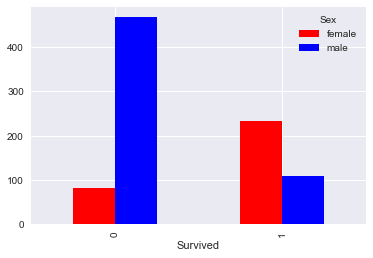

In [55]:
print("Another way:")
print(titanic_data.pivot_table(values='PassengerId', index='Survived', columns='Sex', aggfunc=len))
plt.figure()
titanic_data.pivot_table(values='PassengerId', index='Survived', columns='Sex', aggfunc=len).plot.bar(color=['red', 'blue'])

If you were a woman you had a total 233 / 891 = 0,262 chance of surviving overall and a 233/(233+81) = 0,742 chance between the woman.
If you were a man you had a total 109 / 891 = 0,122 chance of surviving overall and a 109/(109+468) = 0,189 chance between the man.

#### 3) From with age group are most of the survivers?

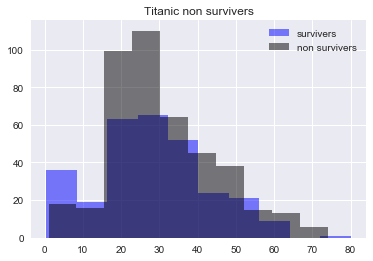

In [58]:
#removing NaN and plotting histogram
index_is_age_nan = titanic_survivers_data.index[titanic_survivers_data['Age'].isnull()]
titanic_survivers_data = titanic_survivers_data.drop(index_is_age_nan)
figure_1 = plt.figure()
ax1 = figure_1.add_subplot(111)
plt.title("Titanic survivers and non survivers")
titanic_survivers_data['Age'].hist(alpha=0.5, color='blue', label = 'survivers')

index_is_age_nan = titanic_non_survivers_data.index[titanic_non_survivers_data['Age'].isnull()]
titanic_non_survivers_data = titanic_non_survivers_data.drop(index_is_age_nan)
plt.title("Titanic non survivers")
titanic_non_survivers_data['Age'].hist(alpha = 0.5, color = 'black', label='non survivers')
plt.legend()

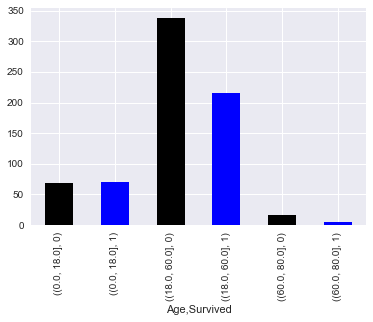

In [100]:
# going to divide the dataset into 3 age groups, first_group from 0 to 18, second_group from 18 to 60 and third group 60+
index_is_age_nan = titanic_data.index[titanic_data['Age'].isnull()]
titanic_data = titanic_data.drop(index_is_age_nan)

group_by_age = titanic_data.groupby([pd.cut(titanic_data['Age'], [0, 18, 60, titanic_data['Age'].max()]), 'Survived'])
group_by_age = group_by_age['Age'].count()
group_by_age.plot.bar(color=['black', 'blue'])

From the graph above we can not see that there is a diference between the number of people that survived and died for the Age group between 0 and 18, going to create another group, 0-8 to see if we can see what the first histogram showed us

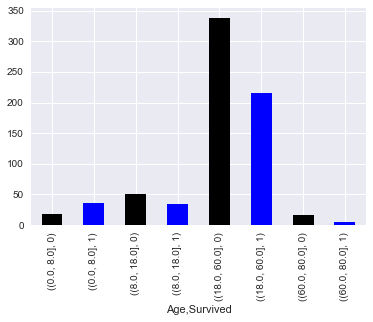

In [110]:
group_by_age = titanic_data.groupby([pd.cut(titanic_data['Age'], [0, 8, 18, 60, titanic_data['Age'].max()]), 'Survived'])
group_by_age = group_by_age['Age'].count()
group_by_age.plot.bar(color=['black', 'blue'])

Ok, now we can observe what we expected from the first histogram, that the only group were we have more survivers than deads is in the group age from 0 to 10, all the other groups we had more deads than survivers.

Now we know that woman have a higher chance of surviving and there is differences in the number of survivers between age groups. Does this tendency of more woman survivers apply to all age groups?

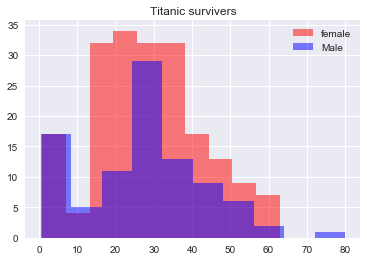

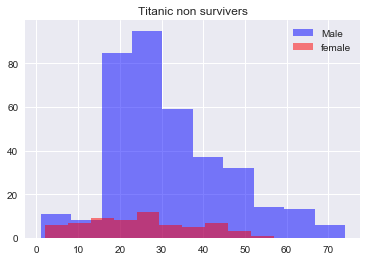

In [121]:
group_by_sex_survivers = titanic_survivers_data.groupby('Sex')

figure_2 = plt.figure()
ax2 = figure_2.add_subplot(111)
plt.title("Titanic survivers")
group_by_sex_survivers.get_group('female')['Age'].hist(alpha=0.5, bins=10, label = 'female', color = 'red')
group_by_sex_survivers.get_group('male')['Age'].hist(alpha=0.5, bins=10, label='Male', color = 'blue')
plt.legend()

group_by_sex_non_survivers = titanic_non_survivers_data.groupby('Sex')

figure_3 = plt.figure()
ax3 = figure_3.add_subplot(111)
plt.title("Titanic non survivers")
group_by_sex_non_survivers.get_group('male')['Age'].hist(alpha=0.5, bins=10, label='Male', color = 'blue')
group_by_sex_non_survivers.get_group('female')['Age'].hist(alpha=0.5, bins=10, label = 'female', color = 'red')
plt.legend()

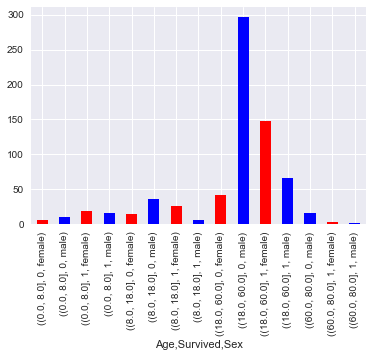

In [120]:
group_by_age = titanic_data.groupby([pd.cut(titanic_data['Age'], [0, 8, 18, 60, titanic_data['Age'].max()]), 'Survived', 'Sex'])
group_by_age = group_by_age['Age'].count()

group_by_age.plot.bar(color=['r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b','r', 'b', 'b', 'r', 'b'])

Yes, we have more woman that survived for all age groups.

#### 5) Are survivers from a distinct social class?

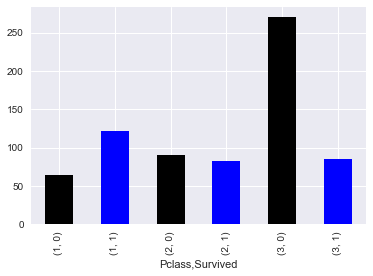

In [148]:
groupby_social_class = titanic_data.groupby(['Pclass', 'Survived'])
groupby_social_class = groupby_social_class['Pclass'].count()
groupby_social_class.plot.bar(color = ['black', 'blue'])

From the graph above we can see that the first class had the biggest number of suvivers.

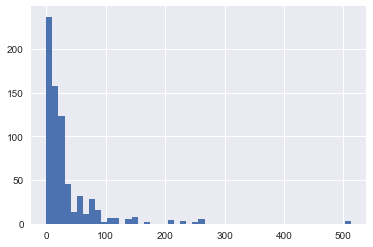

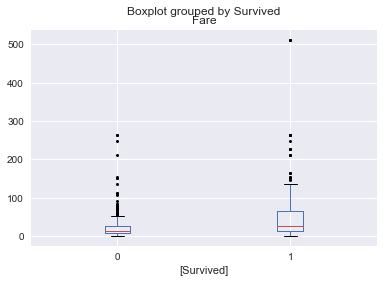

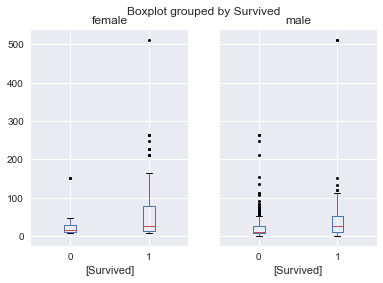

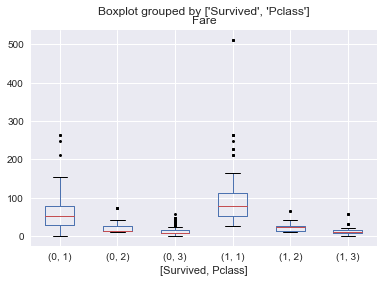

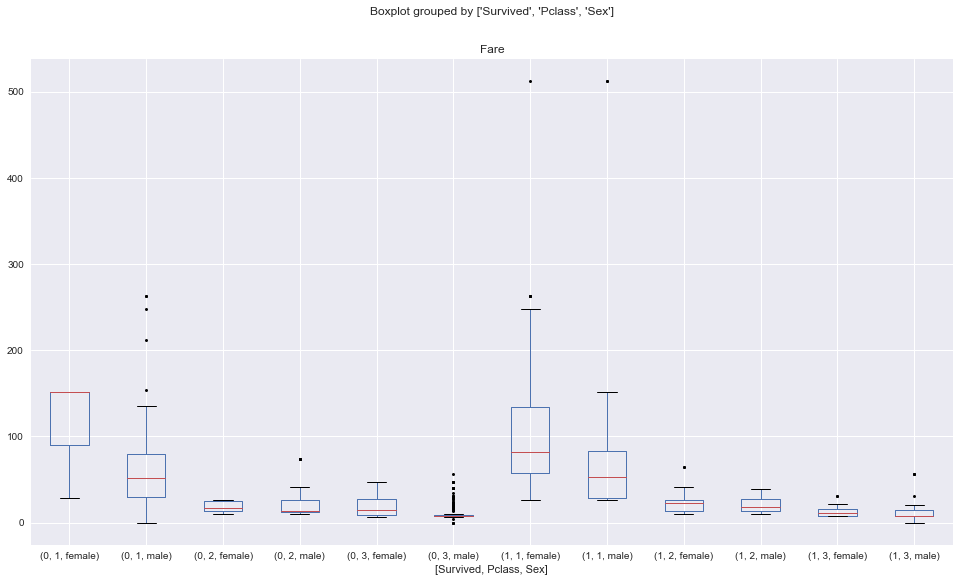

In [152]:
titanic_data['Fare'].hist(bins = 50)

titanic_data.boxplot(column = 'Fare', by=['Survived'], sym='k.')

titanic_data.groupby('Sex').boxplot(column = 'Fare', by=['Survived'], sym='k.')

titanic_data.boxplot(column = 'Fare', by=['Survived', 'Pclass'],sym='k.')

titanic_data.boxplot(column = 'Fare', by=['Survived', 'Pclass', 'Sex'],sym='k.', figsize=(16,9))

The histogram above show us that fare has a positive distribution.

The second and third box plots shows that the ones that survived have paid higher fares, that happened for woman and for man.

On the Third graph, the diference is evident, between the ones that survived, most of the people are from first class.

The fourth graph, Boxplot grouped by survived, Pclass and Sex, does not give more relevant information.

#### 6) With part of the ship had more survivers?

Survived    0    1
Embarked          
C          51   79
Q          20    8
S         353  201
          PassengerId
Embarked             
C                 130
Q                  28
S                 554


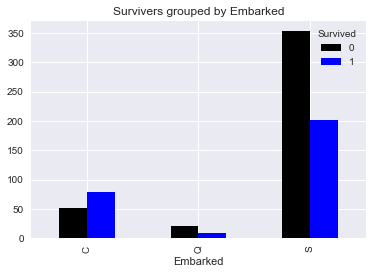

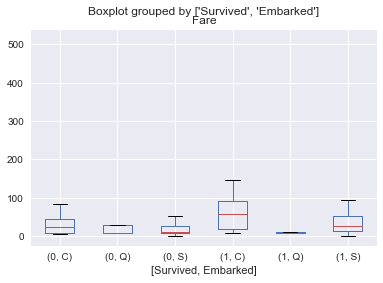

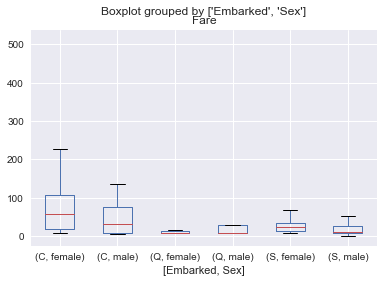

In [155]:
print(titanic_data.pivot_table(values='PassengerId', index='Embarked', columns='Survived', aggfunc=len))
print(titanic_data.pivot_table(values='PassengerId', index='Embarked', aggfunc=len))
titanic_data.pivot_table(values='PassengerId', index='Embarked', columns='Survived',
                         aggfunc=len).plot(kind='bar', color = ['black', 'blue'], title='Survivers grouped by Embarked')

titanic_data.boxplot(column = 'Fare', by=['Survived', 'Embarked'])

titanic_data.boxplot(column = 'Fare', by=['Embarked','Sex'])

The bar plot Survivers grouped by Embarked tell us that most of the people embarked from S.